Shape: (19251, 3)


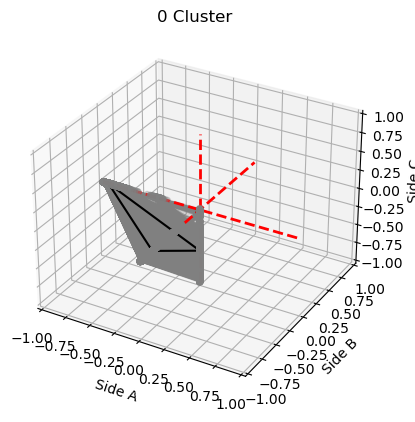

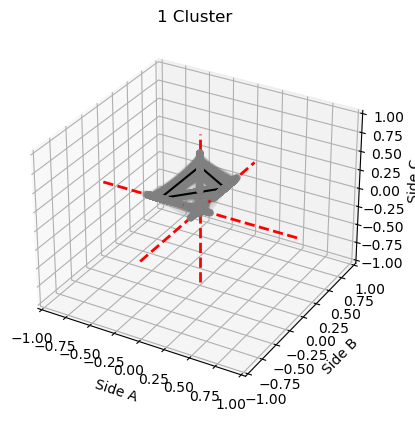

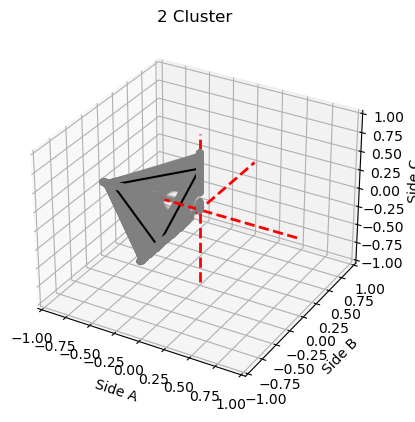

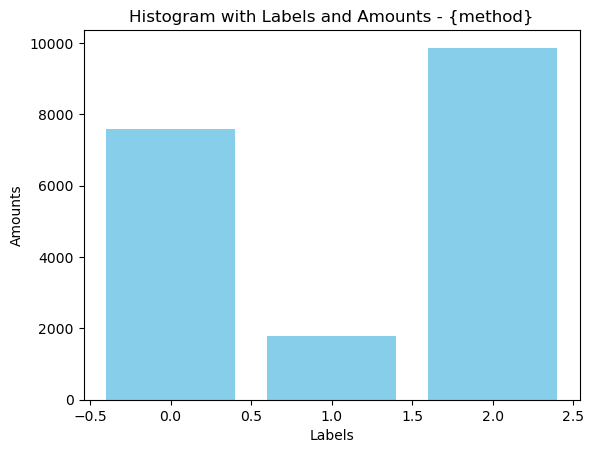

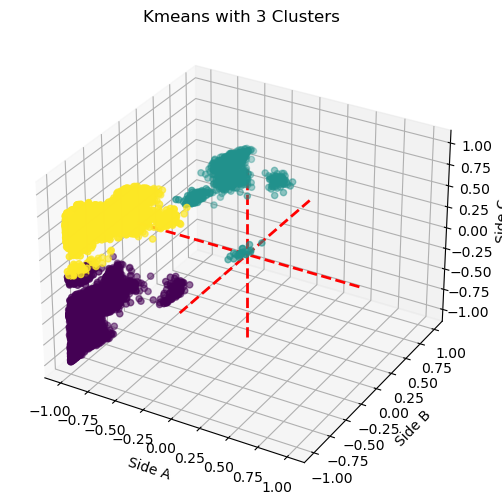

In [12]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

class ClusterVisualizer:
    def __init__(self, directory="0.5gcc_1000k_3bS/", file_range=(50, 75)):
        self.directory = directory
        self.file_range = file_range
        self.data_list = []

    def read_data(self, filename):
        try:
            data = np.loadtxt(filename)
            sort_data = np.sort(data, axis=1)
            self.data_list.append(sort_data)
        except FileNotFoundError:
            print(f"File not found: {filename}")

    def process_files(self):
        for i in range(*self.file_range):
            filename = f'{self.directory}00{i}.3b_clu-s.txt'
            self.read_data(filename)

    def visualize_clusters(self, clusters, concat_data):
        # Get the number of unique clusters
        num_clusters = len(np.unique(clusters))

        # Plot clusters
        for cluster_num in range(0, num_clusters):
            # Filter data points belonging to the current cluster
            selected_data = concat_data[clusters == cluster_num]

            # Create a 3D plot
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')

            # Plot individual triangles with transparent grey lines
            for i in range(len(selected_data)):
                x = [selected_data[i, 0], 0, 0]
                y = [0, selected_data[i, 1], 0]
                z = [0, 0, selected_data[i, 2]]

                # Plot points
                ax.scatter(x, y, z, marker='o', c='grey')

                # Connect the points to form a triangle with transparent grey lines
                ax.plot([x[0], x[1], x[2], x[0]], [y[0], y[1], y[2], y[0]], [z[0], z[1], z[2], z[0]], c='grey', alpha=0.1)

            # Calculate the average triangle
            average_triangle = np.mean(selected_data, axis=0)
            x_avg = [average_triangle[0], 0, 0]
            y_avg = [0, average_triangle[1], 0]
            z_avg = [0, 0, average_triangle[2]]

            # Plot the average triangle with black lines
            ax.plot(x_avg + [x_avg[0]], y_avg + [y_avg[0]], z_avg + [z_avg[0]], c='black')

            # Plot red lines along the x, y, and z axes
            ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
            ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
            ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

            # Set axis labels
            ax.set_xlabel('Side A')
            ax.set_ylabel('Side B')
            ax.set_zlabel('Side C')
            # Set axis limits to range from -1 to 1
            ax.set_xlim([-1, 1])
            ax.set_ylim([-1, 1])
            ax.set_zlim([-1, 1])
            ax.set_title(f"{cluster_num} Cluster")

            # Show the plot
            plt.show()
    
    def perform_kmeans_clustering(self, concat_data, optimal_k=3):
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(concat_data)
        return labels
    
    def plot_raw_data(self, concat_data, labels, optimal_k=3, method="KMeans"):
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(concat_data[:, 0], concat_data[:, 1], concat_data[:, 2], c=labels, marker='o')
        ax.set_xlabel('Side A')
        ax.set_ylabel('Side B')
        ax.set_zlabel('Side C')
        ax.set_title(f'{method} with {optimal_k} Clusters')

        # Plot red lines along the x, y, and z axes
        ax.plot([-1, 1], [0, 0], [0, 0], c='red', linestyle='--', linewidth=2)  # X-axis
        ax.plot([0, 0], [-1, 1], [0, 0], c='red', linestyle='--', linewidth=2)  # Y-axis
        ax.plot([0, 0], [0, 0], [-1, 1], c='red', linestyle='--', linewidth=2)  # Z-axis

        plt.show()
        
    def plot_histogram(self, labels, method="KMeans"):
        unique_labels, counts = np.unique(labels, return_counts=True)

        # Create a bar plot
        plt.bar(unique_labels, counts, color='skyblue')

        # Add labels and title
        plt.xlabel('Labels')
        plt.ylabel('Amounts')
        plt.title('Histogram with Labels and Amounts - {method}')

        # Show the plot
        plt.show()

    def run(self):
        self.process_files()
        concat_data = np.concatenate(self.data_list, axis=0)
        print("Shape:", np.shape(concat_data))
        
        # Perform clustering or any other processing if needed
        optimal_k = 3
        labels = self.perform_kmeans_clustering(concat_data, optimal_k)

        # Visualize clusters
        self.visualize_clusters(labels, concat_data)

        # Plot histogram
        self.plot_histogram(labels)

        # Plot raw data with labels
        self.plot_raw_data(concat_data, labels, optimal_k, method="Kmeans")

# Usage of the class
cluster_visualizer = ClusterVisualizer()
cluster_visualizer.run()
